In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
sns.set_palette("icefire")
pd.set_option('display.max_columns', 500)

# Load Data

In [2]:
patient = joblib.load("patient.pkl")

In [3]:
print(patient.shape)
patient.head()

(558211, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,0,1,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,0,1,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,0,1,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331,NaN,NaN,NaN,NaN,NaN,0,1914-03-01,NaT,1,2,0,1,360,12,12,1,0,0,1,1,0,0,1,1,0,0,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893,NaN,NaN,NaN,NaN,NaN,0,1938-04-01,NaT,1,1,1,45,780,12,12,1,0,0,1,0,0,1,0,1,1,1,21260,2136,120,100,No


# EDA

Some of the most common types of frauds by providers are:

* Billing for services that were not provided.

* Duplicate submission of a claim for the same service.

* Misrepresenting the service provided.

* Charging for a more complex or expensive service than was actually provided.

* Billing for a covered service when the service actually provided was not covered.

## Q. How many unique beneficiaries did each provider have?

In [4]:
num_bene = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])[['BeneID']].nunique()
num_bene.columns.values[0] = 'NuniqueBene'
num_bene = pd.DataFrame(num_bene).reset_index()
num_bene

,PotentialFraud,IsOutpatient,Provider,NuniqueBene
0,No,0,PRV51001,5
1,No,0,PRV51007,3
2,No,0,PRV51008,2
3,No,0,PRV51011,1
4,No,0,PRV51023,9
...,...,...,...,...
7099,Yes,1,PRV57569,58
7100,Yes,1,PRV57642,101
7101,Yes,1,PRV57672,342
7102,Yes,1,PRV57697,17


Text(0.5, 1.0, 'Number of Unique outpatient Beneficiaries by Providers')

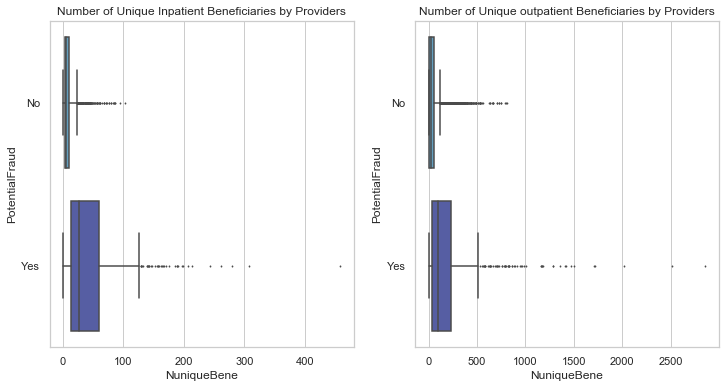

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = num_bene[num_bene['IsOutpatient'] == 0], 
            x = "NuniqueBene", y = 'PotentialFraud', ax = ax[0], fliersize= 1);
sns.boxplot(data = num_bene[num_bene['IsOutpatient'] == 1], 
            x = "NuniqueBene", y = 'PotentialFraud', ax = ax[1], fliersize= 1);
ax[0].set_title("Number of Unique Inpatient Beneficiaries by Providers")
ax[1].set_title("Number of Unique outpatient Beneficiaries by Providers")

## Q. How many claims did each provider make?


In [6]:
num_clm = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])[['ClaimID']].size()
num_clm = pd.DataFrame(num_clm, columns = ["Count"]).reset_index().set_index("Provider")
num_clm

,PotentialFraud,IsOutpatient,Count
Provider,,,
PRV51001,No,0,5
PRV51007,No,0,3
PRV51008,No,0,2
PRV51011,No,0,1
PRV51023,No,0,9
...,...,...,...
PRV57569,Yes,1,68
PRV57642,Yes,1,197
PRV57672,Yes,1,425


Text(0.5, 1.0, 'Number of Outpatient Claims Made by Providers')

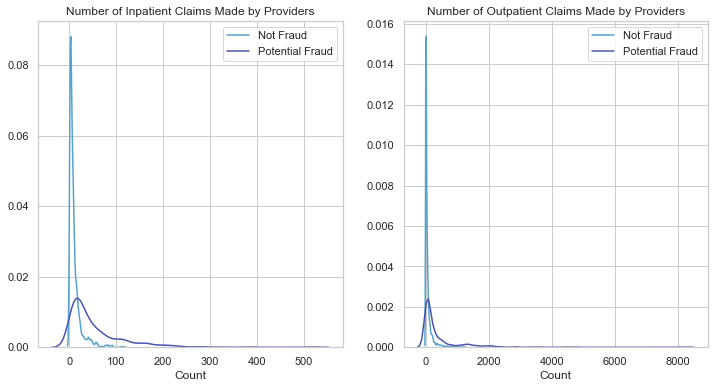

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(num_clm.loc[(num_clm['IsOutpatient'] == 0) & (num_clm['PotentialFraud'] == "No"),
                         "Count"], hist = False, label = "Not Fraud", ax = ax[0]);
sns.distplot(num_clm.loc[(num_clm['IsOutpatient'] == 0) & (num_clm['PotentialFraud'] == "Yes"),
                         "Count"], hist = False, label = "Potential Fraud", ax = ax[0]);
sns.distplot(num_clm.loc[(num_clm['IsOutpatient'] == 1) & (num_clm['PotentialFraud'] == "No"),
                         "Count"], hist = False, label = "Not Fraud", ax = ax[1]);
sns.distplot(num_clm.loc[(num_clm['IsOutpatient'] == 1) & (num_clm['PotentialFraud'] == "Yes"),
                         "Count"], hist = False, label = "Potential Fraud", ax = ax[1]);
ax[0].set_title("Number of Inpatient Claims Made by Providers")
ax[1].set_title("Number of Outpatient Claims Made by Providers")

## Q. How many days does it take for claims to end on average for providers?


In [8]:
patient["ClaimDuration"] = patient["ClaimEndDt"] - patient["ClaimStartDt"]
patient["ClaimDuration"] = patient["ClaimDuration"].dt.days

In [9]:
clm_dur = patient[['PotentialFraud','IsOutpatient', 'ClaimDuration']]
clm_dur

,PotentialFraud,IsOutpatient,ClaimDuration
0,Yes,0,6
1,No,0,2
2,No,0,3
3,No,0,8
4,No,0,17
...,...,...,...
558206,No,1,0
558207,No,1,0
558208,No,1,0
558209,No,1,0


Text(0.5, 1.0, 'Claim Duration for Outpatients')

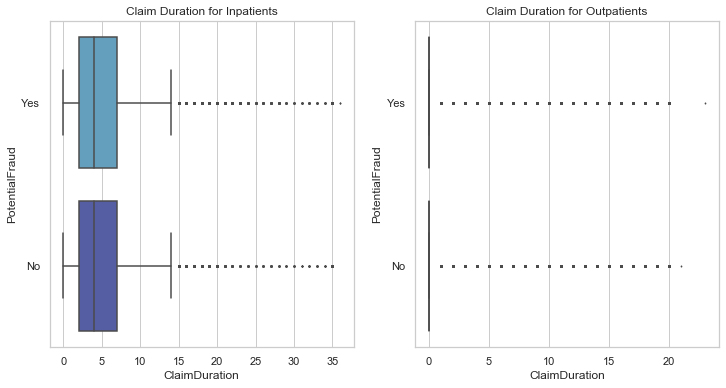

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = clm_dur[clm_dur['IsOutpatient'] == 0], 
            x = "ClaimDuration", y = 'PotentialFraud', ax = ax[0], fliersize= 1);
sns.boxplot(data = clm_dur[clm_dur['IsOutpatient'] == 1], 
            x = "ClaimDuration", y = 'PotentialFraud', ax = ax[1], fliersize= 1);
ax[0].set_title("Claim Duration for Inpatients")
ax[1].set_title("Claim Duration for Outpatients")
# Why are there Outpatients that takes more than 1 day to claim?

In [11]:
clm_dur = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])[["ClaimDuration"]].mean()
clm_dur = pd.DataFrame(clm_dur).reset_index()
clm_dur.columns.values[3] = 'MeanClmDuration'
clm_dur

,PotentialFraud,IsOutpatient,Provider,MeanClmDuration
0,No,0,PRV51001,5.000000
1,No,0,PRV51007,5.333333
2,No,0,PRV51008,4.000000
3,No,0,PRV51011,5.000000
4,No,0,PRV51023,3.555556
...,...,...,...,...
7099,Yes,1,PRV57569,2.647059
7100,Yes,1,PRV57642,0.949239
7101,Yes,1,PRV57672,1.242353
7102,Yes,1,PRV57697,1.166667


Text(0.5, 1.0, 'Mean Claim Duration for Outpatients by Providers')

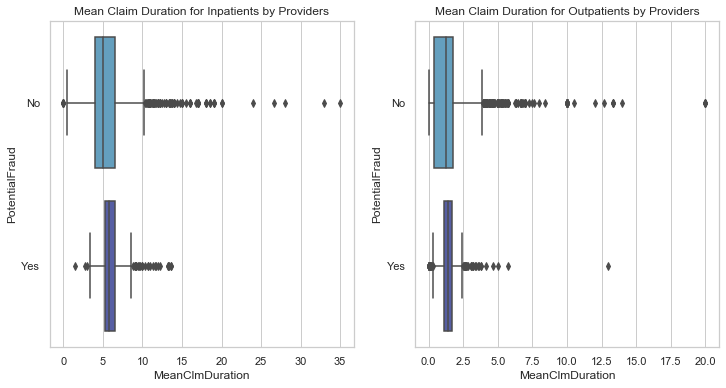

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = clm_dur[(clm_dur['IsOutpatient'] == 0)], 
            x = "MeanClmDuration", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = clm_dur[(clm_dur['IsOutpatient'] == 1)], 
            x = "MeanClmDuration", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Mean Claim Duration for Inpatients by Providers")
ax[1].set_title("Mean Claim Duration for Outpatients by Providers")
# So when we mean by the providers the distinct patterns can be noticed

## Q. What is the total/mean/median amount of reimbursed claims for each provider?

In [13]:
avg_reimb = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])\
            [["InscClaimAmtReimbursed"]].agg(['sum','mean','median'])
avg_reimb.columns = avg_reimb.columns.get_level_values(0)
avg_reimb.columns.values[0] = 'TotalAmtReimbursed'
avg_reimb.columns.values[1] = 'MeanAmtReimbursed'
avg_reimb.columns.values[2] = 'MedianAmtReimbursed'
avg_reimb= avg_reimb.reset_index()
avg_reimb

,PotentialFraud,IsOutpatient,Provider,TotalAmtReimbursed,MeanAmtReimbursed,MedianAmtReimbursed
0,No,0,PRV51001,97000,19400.000000,12000
1,No,0,PRV51007,19000,6333.333333,6000
2,No,0,PRV51008,25000,12500.000000,12500
3,No,0,PRV51011,5000,5000.000000,5000
4,No,0,PRV51023,54000,6000.000000,4000
...,...,...,...,...,...,...
7099,Yes,1,PRV57569,26940,396.176471,85
7100,Yes,1,PRV57642,33470,169.898477,70
7101,Yes,1,PRV57672,118190,278.094118,80
7102,Yes,1,PRV57697,4650,258.333333,65


Text(0.5, 1.0, 'Total Amount of Reimbursed Claims for Outpatients by Providers ($)')

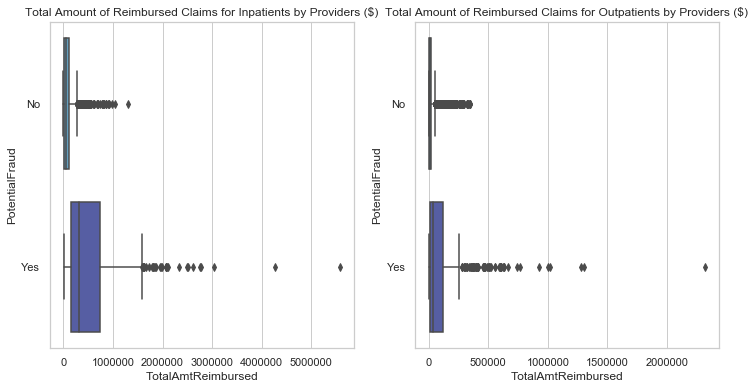

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 0)], 
            x = "TotalAmtReimbursed", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 1)], 
            x = "TotalAmtReimbursed", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Total Amount of Reimbursed Claims for Inpatients by Providers ($)")
ax[1].set_title("Total Amount of Reimbursed Claims for Outpatients by Providers ($)")

Text(0.5, 1.0, 'Mean Amount of Reimbursed Claims for Outpatients by Providers ($)')

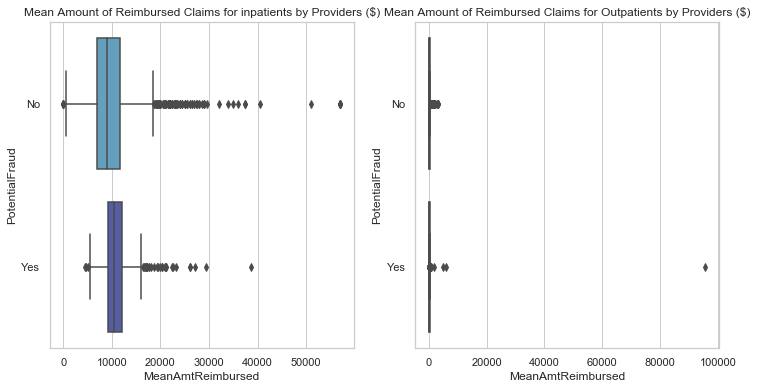

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 0)], 
            x = "MeanAmtReimbursed", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 1)], 
            x = "MeanAmtReimbursed", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Mean Amount of Reimbursed Claims for inpatients by Providers ($)")
ax[1].set_title("Mean Amount of Reimbursed Claims for Outpatients by Providers ($)")

Text(0.5, 1.0, 'Median Amount of Reimbursed Claims for Outpatients by Providers ($)')

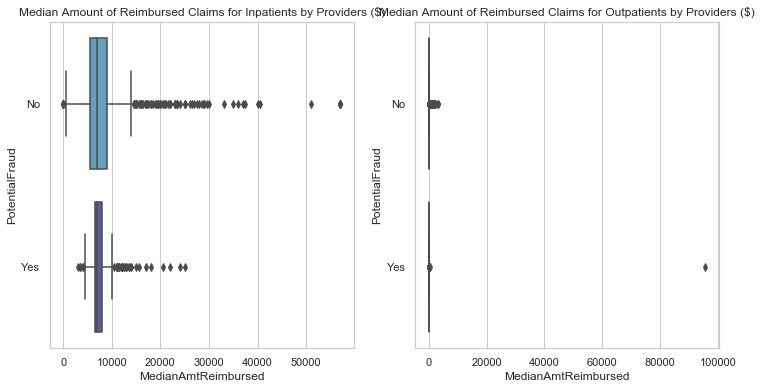

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 0)], 
            x = "MedianAmtReimbursed", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 1)], 
            x = "MedianAmtReimbursed", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Median Amount of Reimbursed Claims for Inpatients by Providers ($)")
ax[1].set_title("Median Amount of Reimbursed Claims for Outpatients by Providers ($)")

## Q. How many claims did not have any physician involved for providers?

In [17]:
patient["NoPhy"] = patient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].isna().all(axis =1)

In [18]:
no_phy = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])[['NoPhy']].sum()
no_phy.columns.values[0] = 'ClmWithNoPhy'
no_phy = pd.DataFrame(no_phy).reset_index()
no_phy

,PotentialFraud,IsOutpatient,Provider,ClmWithNoPhy
0,No,0,PRV51001,0.0
1,No,0,PRV51007,0.0
2,No,0,PRV51008,0.0
3,No,0,PRV51011,0.0
4,No,0,PRV51023,0.0
...,...,...,...,...
7099,Yes,1,PRV57569,0.0
7100,Yes,1,PRV57642,0.0
7101,Yes,1,PRV57672,1.0
7102,Yes,1,PRV57697,0.0


Text(0.5, 1.0, 'Claims with no physicians for Outpatients by Providers')

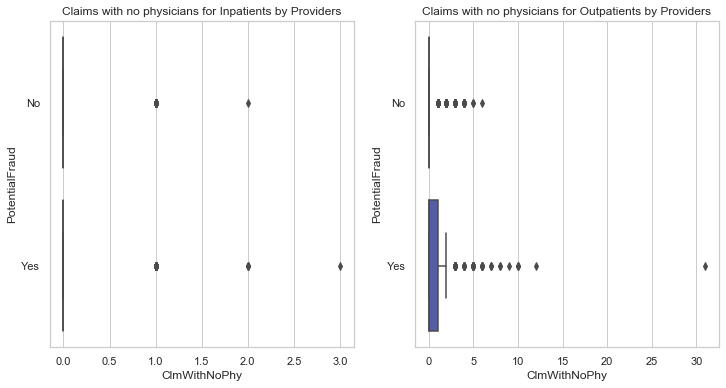

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = no_phy[(no_phy['IsOutpatient'] == 0)], 
            x = "ClmWithNoPhy", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = no_phy[(no_phy['IsOutpatient'] == 1)], 
            x = "ClmWithNoPhy", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Claims with no physicians for Inpatients by Providers")
ax[1].set_title("Claims with no physicians for Outpatients by Providers")

## Q. How many claims had all physicians involved for providers?

In [20]:
patient['AllPhy'] = patient[['AttendingPhysician', 'OperatingPhysician']].notnull().all(axis =1)

In [21]:
all_phy = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])[['AllPhy']].sum()
all_phy.columns.values[0] = 'ClmWithAllPhy'
all_phy = pd.DataFrame(all_phy).reset_index()
all_phy

,PotentialFraud,IsOutpatient,Provider,ClmWithAllPhy
0,No,0,PRV51001,2.0
1,No,0,PRV51007,1.0
2,No,0,PRV51008,2.0
3,No,0,PRV51011,0.0
4,No,0,PRV51023,5.0
...,...,...,...,...
7099,Yes,1,PRV57569,11.0
7100,Yes,1,PRV57642,31.0
7101,Yes,1,PRV57672,77.0
7102,Yes,1,PRV57697,1.0


Text(0.5, 1.0, 'Claims with all physicians for Outpatients by Providers')

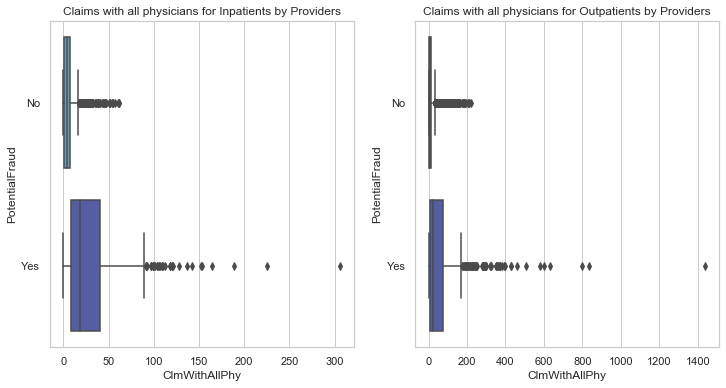

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = all_phy[(all_phy['IsOutpatient'] == 0)], 
            x = "ClmWithAllPhy", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = all_phy[(all_phy['IsOutpatient'] == 1)], 
            x = "ClmWithAllPhy", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Claims with all physicians for Inpatients by Providers")
ax[1].set_title("Claims with all physicians for Outpatients by Providers")

## Q. How many days do inpatients stay in hospitals on average for providers?
* Outpatients are out of consideration since they are never admitted to the hospitals

In [23]:
patient["AdmisDuration"] = patient["DischargeDt"] - patient["AdmissionDt"]
patient["AdmisDuration"] = patient["AdmisDuration"].dt.days

In [24]:
adm_dur = patient[patient['IsOutpatient'] == 0].\
        groupby(['PotentialFraud','Provider'])[["AdmisDuration"]].mean()
adm_dur.columns.values[0] = 'MeanAdmisDuration'
adm_dur = pd.DataFrame(adm_dur).reset_index()
adm_dur

,PotentialFraud,Provider,MeanAdmisDuration
0,No,PRV51001,5.000000
1,No,PRV51007,5.333333
2,No,PRV51008,4.000000
3,No,PRV51011,5.000000
4,No,PRV51023,3.555556
...,...,...,...
2087,Yes,PRV57631,5.388889
2088,Yes,PRV57642,6.347826
2089,Yes,PRV57667,11.000000
2090,Yes,PRV57697,5.104167


Text(0.5, 1.0, 'Mean Admission Duration for inpatients by Providers')

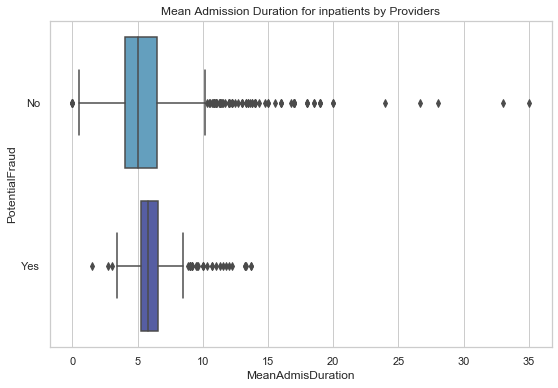

In [25]:
sns.boxplot(data = adm_dur, x = "MeanAdmisDuration", y = 'PotentialFraud');
plt.title("Mean Admission Duration for inpatients by Providers")

## Q. What is the total deductible amount of claims for each provider?

In [26]:
avg_deduct = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])\
            [["DeductibleAmtPaid"]].sum()
avg_deduct.columns.values[0] = 'TotalDeductibleAmt'
avg_deduct= avg_deduct.reset_index()
avg_deduct

,PotentialFraud,IsOutpatient,Provider,TotalDeductibleAmt
0,No,0,PRV51001,5340.0
1,No,0,PRV51007,3204.0
2,No,0,PRV51008,2136.0
3,No,0,PRV51011,1068.0
4,No,0,PRV51023,8544.0
...,...,...,...,...
7099,Yes,1,PRV57569,60.0
7100,Yes,1,PRV57642,700.0
7101,Yes,1,PRV57672,1850.0
7102,Yes,1,PRV57697,70.0


Text(0.5, 1.0, 'Total Deductible Amount for Outpatients by Providers ($)')

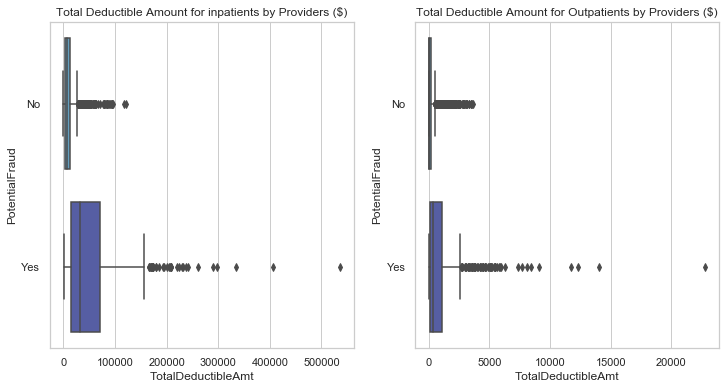

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = avg_deduct[(avg_deduct['IsOutpatient'] == 0)], 
            x = "TotalDeductibleAmt", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = avg_deduct[(avg_deduct['IsOutpatient'] == 1)], 
            x = "TotalDeductibleAmt", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Total Deductible Amount for inpatients by Providers ($)")
ax[1].set_title("Total Deductible Amount for Outpatients by Providers ($)")

## Missing Values

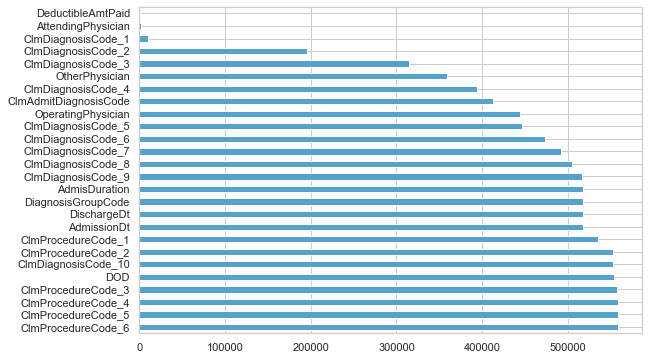

In [28]:
missing = pd.DataFrame(patient.isna().sum().sort_values(ascending = False), columns = ["Count_NaN"])
missing[missing["Count_NaN"] > 0].plot(kind= 'barh',legend = None);

In [29]:
missing[missing['Count_NaN'] > 0 ]

,Count_NaN
ClmProcedureCode_6,558211
ClmProcedureCode_5,558202
ClmProcedureCode_4,558093
ClmProcedureCode_3,557242
DOD,554080
ClmDiagnosisCode_10,553201
ClmProcedureCode_2,552721
ClmProcedureCode_1,534901
AdmissionDt,517737
DischargeDt,517737
